<h1 align=center><font size = 20>House Sale in King County, USA (Data Analysis)</font></h1>

We are working at a Real Estate Investment Trust as Data Analyst. The Trust would like to start investing in Residential real estate. We are tasked with determining the market price of a house given a set of features. We will analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on. <br>
The dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. Which was taken from **KAGGALE**.

#### First import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

%matplotlib inline

## Importing Data Set

Load the csv:

In [2]:
df = pd.read_csv('kc_house_data.csv')

Here's the first 5 columns of the dataframe

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Now we display the data types of each column using the function dtypes.

In [4]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

It's time to describe the statistical summary of the Dataframe.

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Wrangling

We want to drop the column <code>'id'</code> using the method <code>'drop()'</code>, and then use <code>'describe()'</code> method to obtain a statistical summary of the data.

In [6]:
df.drop(['id'], axis=1, inplace=True)

In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Check out missing values from the Dataset

In [8]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There's no missing value in the Data frame so let's continue our progress.

## Exploratory Data Analysis

In EDA we use the method <code>'value_counts'</code> to count the number of houses with unique floor values, and use the method <code>'.to_frame()'</code> to convert it in to a dataframe

In [10]:
floort_count = df['floors'].value_counts().to_frame()
floort_count

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


From the seaborn library we use <code>'boxplot'</code> to determine whether houses with a waterfront view or without a waterfront view have more price outliers.

<AxesSubplot:xlabel='waterfront', ylabel='price'>

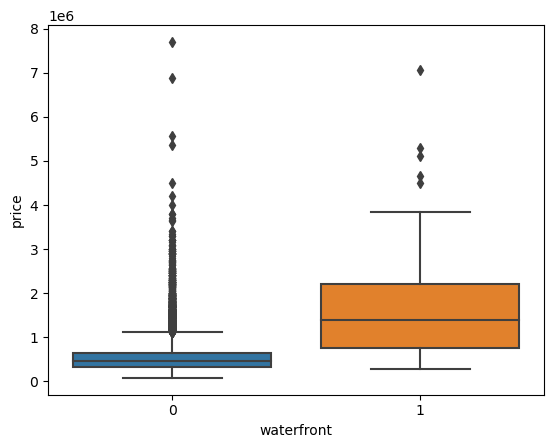

In [11]:
sns.boxplot(x='waterfront', y='price', data=df)

Now we using <code>'regplot'</code> to determine if the feature <code>'sqft_above'</code> is negatively or positively correlated with price.

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

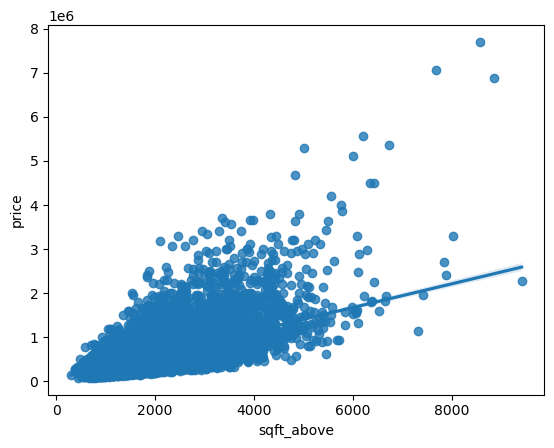

In [12]:
sns.regplot(x='sqft_above', y='price', data=df)

We use the Pandas method <code>'corr()'</code> to find the feature other than price that is most correlated with price.

In [13]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

## Model Development

Fit a linear regression model to predict the <code>price</code> using the feature <code>'sqft_living'</code> and then we calculate the R^2.

In [14]:
X = df[['sqft_living']]
Y = df[['price']]
lm = LinearRegression()
lm.fit(X, Y)
lm.score(X, Y)

0.4928532179037931

Now we fit a linear regression model to predict the <code>'Price'</code> using the list of features:

In [15]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

and now calculate the R^2.

In [16]:
lm = LinearRegression().fit(df[features], df[['price']])
lm.score(df[features], df[['price']])

0.6577156324316752

We Create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>

In [18]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

We use the list to create a pipeline object to predict the <code>'price'</code>, fit the object using the features in the list <code>'features'</code>, and calculate the R^2.

In [19]:
pipe = Pipeline(Input)
pipe.fit(df[features], df[['price']])
pipe.score(df[features], df[['price']])

0.7513463451976545

## Model Evaluation and Refinement

Import the necessary module:

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

We will split the data into training and testing sets:

In [22]:
features = ['floors', "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print('Number of test samples: ', x_test.shape[0])
print('Number of training samples: ', x_train.shape[0])

Number of test samples:  3242
Number of training samples:  18371


Now we create a fit a **Ridge Regression** object using the training data, set the regularization parameter to 0.1, and then calculate the R^2 using the test data.

In [23]:
from sklearn.linear_model import Ridge

In [24]:
RR = Ridge(alpha=0.1).fit(x_train, y_train)
RR.score(x_test, y_test)

0.6480374087702245

We are now performing a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
RR1 = Ridge(alpha=0.1).fit(x_train_poly, y_train)
RR1.score(x_test_poly, y_test)

0.7004432036203001

### About the Author
**Ali Abdullah** 

<a href="https://www.linkedin.com/in/imaliabdullah/">Click here for Linkedin Profile</a>